# 210620M Lab 1 Jupyter Notebook

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

Importing Required Libraries.
Pandas is used for handling the dataframes
ScikitLearn for encoding categorical features

In [24]:
train_set = pd.read_csv('train.csv')

Storing the train data set in the train_set data frame

In [25]:
feature_list = train_set.columns.tolist()
removableFeatures=[]

feature_list holds the features in the data frame. romovableFeatures are the features that we remove from the data frame prior to modeling the dataset

# Removing Features

In [26]:
#remove the features with more than 30% null values
def Remove_Maj_Null_Features(df, feature_list):
    total_values_feature = df.shape[0]
    count = 0
    featuresWithNulls = []
    for feature in feature_list:
        if df[feature].count()<total_values_feature*0.7:
            featuresWithNulls.append(feature)
    df.drop(columns=featuresWithNulls, inplace=True)
    return featuresWithNulls
NullFeatures = Remove_Maj_Null_Features(train_set,feature_list)
removableFeatures=removableFeatures+NullFeatures

While analyzing the data set it was clear that there were many features with null data sets. while taking 30% as the maximum null threshold for each feature we are removing other features from the data set.

In [27]:
#droppingSingleValuedFeatures
def Drop_Single_Valued_Features(df):
    singleUniqueFeatures = [feature for feature in df.columns if df[feature].nunique() == 1]
    return singleUniqueFeatures
    
singleUniqueFeatures = Drop_Single_Valued_Features(train_set)
train_set.drop(columns=singleUniqueFeatures, inplace=True)
removableFeatures = removableFeatures+singleUniqueFeatures
print(singleUniqueFeatures)

['pymnt_plan', 'out_prncp', 'out_prncp_inv', 'policy_code', 'hardship_flag']


Above given are output features are then removed because they have the same value for all rows.

In [28]:
#checking rows with less than 50% of data included
print("Number of rows before cleaning: ", train_set.shape[0])
threshold = len(train_set.columns) * 0.5
df = train_set.dropna(thresh=threshold)
print("Number of rows after cleaning: ", df.shape)

Number of rows before cleaning:  517788
Number of rows after cleaning:  (517788, 82)


When checking if there are data entries which have more than 50% features as null, we find that there aren't any

In [29]:
#Following features can be removed from data set due to their irrelevance
irrelevantFeatures = ['emp_title','zip_code','addr_state']
train_set.drop(columns=irrelevantFeatures, inplace=True)
removableFeatures = removableFeatures+irrelevantFeatures

When analyzing these features it was clear that emp_title had large abstraction to be encoded and zip_code,addr_state is assumed as features that can be removed due to their irrelavance to the final prediction.

In [30]:
highRatioUniqueFeatures = []
for feature in train_set.columns:
        value_counts = train_set[feature].value_counts(normalize=True)
        max_ratio_value = value_counts.idxmax()
        max_ratio = value_counts.max()
        
        # Print the ratios for values with ratio > 0.99 of the max ratio
        for value, ratio in value_counts.items():
            if ratio > 0.99:
                highRatioUniqueFeatures.append(feature)
train_set.drop(columns=highRatioUniqueFeatures, inplace=True)  
removableFeatures = removableFeatures + highRatioUniqueFeatures

We can assume that if a data set has 99% with same value its impact on the result is low. So after checking these features, they are also being removed.

In [31]:
train_set.drop(columns=['grade','title'], inplace=True) 
removableFeatures = removableFeatures+['grade','title']

sub_grade gives the same insight as the grade but more so grade feature can be removed. Purpose and title also gives the same insight but title seems to have null values so title is removed

# Encoding and Imputing for Null Values in Categorical Features

In [32]:
def encodeTerm(train_set):
    #Label encoding term and impute mode for null
    mode_term = train_set['term'].mode()[0]
    train_set['term'] = train_set['term'].fillna(mode_term)
    term_values = train_set['term'].values
    term_label_mapping = {
        ' 36 months':1,
        ' 60 months':2
    }
    label_encoder = LabelEncoder()
    label_encoder.fit(list(term_label_mapping.keys()))
    term_encoded_values = [term_label_mapping[value] for value in term_values]
    train_set['term'] = term_encoded_values
    return train_set

def encodeSubGrade(train_set):
    #Label encoding sub_grade and impute mode for null
    mode_SG = train_set['sub_grade'].mode()[0]
    train_set['sub_grade'] = train_set['sub_grade'].fillna(mode_SG)
    subGrade_values = train_set['sub_grade'].values
    subGrade_label_mapping = {
        'A1':1, 'A2':2, 'A3':3, 'A4':4, 'A5':5, 'B1':6, 'B2':7, 'B3':8, 'B4':9, 'B5':10, 'C1':11, 'C2':12, 'C3':13, 'C4':14, 'C5':15, 'D1':16, 'D2':17, 'D3':18, 'D4':19, 'D5':20, 'E1':21, 'E2':22, 'E3':23, 'E4':24, 'E5':25, 'F1':26, 'F2':27, 'F3':28, 'F4':29, 'F5':30, 'G1':31, 'G2':32, 'G3':33, 'G4':34, 'G5':35
    }
    label_encoder = LabelEncoder()
    label_encoder.fit(list(subGrade_label_mapping.keys()))
    subGrade_encoded_values = [subGrade_label_mapping[value] for value in subGrade_values]
    train_set['sub_grade'] = subGrade_encoded_values
    return train_set

def encodeDSFlag(train_set):
    #label encoding debt_settlement_flag and impute mode for null
    mode_DSF = train_set['debt_settlement_flag'].mode()[0]
    train_set['debt_settlement_flag'] = train_set['debt_settlement_flag'].fillna(mode_DSF)
    debtSettlementFlag_values = train_set['debt_settlement_flag'].values
    debtSettlementFlag_label_mapping = {'N':0, 'Y':1}
    label_encoder = LabelEncoder()
    label_encoder.fit(list(debtSettlementFlag_label_mapping.keys()))
    debtSettlementFlag_encoded_values = [debtSettlementFlag_label_mapping[value] for value in debtSettlementFlag_values]
    train_set['debt_settlement_flag'] = debtSettlementFlag_encoded_values
    return train_set

def encodeEmpLen(train_set):   
    #Label encoding emp_length and impute mode for null
    mode_empLength = train_set['emp_length'].mode()[0]
    train_set['emp_length'] = train_set['emp_length'].fillna(mode_empLength)
    empLength_values = train_set['emp_length'].values
    empLength_label_mapping = {'1 year':1, '4 years':4, '< 1 year':0, '5 years':5, '10+ years':11, '2 years':2, '7 years':7, '9 years':9, '3 years':3, '8 years':8, '6 years':6}
    label_encoder = LabelEncoder()
    label_encoder.fit(list(empLength_label_mapping.keys()))
    empLength_encoded_values = [empLength_label_mapping[value] for value in empLength_values]
    train_set['emp_length'] = empLength_encoded_values
    return train_set
    
def encodeVerification(train_set):
    #label encoding verification_staues and impute mode for null
    mode_ver = train_set['verification_status'].mode()[0]
    train_set['verification_status'] = train_set['verification_status'].fillna(mode_ver)
    verification_values = train_set['verification_status'].values
    verification_label_mapping = {'Not Verified':1, 'Verified':2, 'Source Verified':3}
    label_encoder = LabelEncoder()
    label_encoder.fit(list(verification_label_mapping.keys()))
    verification_encoded_values = [verification_label_mapping[value] for value in verification_values]
    train_set['verification_status'] = verification_encoded_values
    return train_set
    
def encodeInitialStat(train_set):
    #label encoding initial_list_status and impute mode for null
    mode_iStat = train_set['initial_list_status'].mode()[0]
    train_set['initial_list_status'] = train_set['initial_list_status'].fillna(mode_iStat)
    initialStat_values = train_set['initial_list_status'].values
    initialStat_label_mapping = {'f':1,'w':0}
    label_encoder = LabelEncoder()
    label_encoder.fit(list(initialStat_label_mapping.keys()))
    initialStat_encoded_values = [initialStat_label_mapping[value] for value in initialStat_values]
    train_set['initial_list_status'] = initialStat_encoded_values
    return train_set
    
def encodeApplicationType(train_set):
    #label encoding application_type and impute mode for null
    mode_appType = train_set['application_type'].mode()[0]
    train_set['application_type'] = train_set['application_type'].fillna(mode_appType)
    applicationType_values = train_set['application_type'].values
    applicationType_label_mapping = {'Individual':1,'Joint App':0}
    label_encoder = LabelEncoder()
    label_encoder.fit(list(applicationType_label_mapping.keys()))
    applicationType_encoded_values = [applicationType_label_mapping[value] for value in applicationType_values]
    train_set['application_type'] = applicationType_encoded_values
    return train_set
    
def encodeHomeOwnership(train_set):
    #Onehot encoding home_ownership and imputing mode for null
    mode_HO = train_set['home_ownership'].mode()[0]
    train_set['home_ownership'] = train_set['home_ownership'].fillna(mode_HO)
    oneHotEncodedHomeOwnership = pd.get_dummies(train_set['home_ownership'], prefix='home_ownership')
    train_set = pd.concat([train_set, oneHotEncodedHomeOwnership], axis=1)
    one_Hot_List = oneHotEncodedHomeOwnership.columns.tolist()
    train_set.drop('home_ownership', axis=1, inplace=True)
    return train_set
    
def encodePurpose(train_set):
    #Onehot encoding purpose and imputing mode for null
    mode_purpose = train_set['purpose'].mode()[0]
    train_set['purpose'] = train_set['purpose'].fillna(mode_purpose)
    oneHotEncodedpurpose = pd.get_dummies(train_set['purpose'], prefix='purpose')
    train_set = pd.concat([train_set, oneHotEncodedpurpose], axis=1)
    one_Hot_List = oneHotEncodedpurpose.columns.tolist()
    train_set.drop('purpose', axis=1, inplace=True)
    return train_set
    
def encodeClass(df):
    #call the encoding functions for df
    df = encodeTerm(df)
    df = encodeSubGrade(df)
    df = encodeDSFlag(df)
    df = encodeEmpLen(df)
    df = encodeVerification(df)
    df = encodeInitialStat(df)
    df = encodeApplicationType(df)
    df = encodeHomeOwnership(df)
    df = encodePurpose(df)
    return df

train_set = encodeClass(train_set)

# Feature crossing (synthesis of new features)

In [33]:
def transformDates(feature, train_set):
    # Convert 'feature' to datetime
    train_set[feature] = pd.to_datetime(train_set[feature], errors='coerce')
    
    # Calculate the mode value (most frequent date)
    mode_value = train_set[feature].mode()[0]
    
    # Replace null values with the mode value
    train_set[feature].fillna(mode_value, inplace=True)
    
    # Find the earliest date after filling missing values
    earliest_date = train_set[feature].min()
    
    # Convert dates to numerical values based on months from earliest date
    train_set[feature] = (train_set[feature] - earliest_date).dt.days // 30
    
transformDates('issue_d',train_set)
transformDates('earliest_cr_line',train_set)
transformDates('last_pymnt_d',train_set)
transformDates('last_credit_pull_d',train_set)

Transform date to a value and impute the mode to null values. date values are formatted with respect to the earliest date given in the feature

In [34]:
Dealt_features = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d','term','sub_grade','debt_settlement_flag','emp_length','verification_status','initial_list_status','application_type','home_ownership','purpose']

These are the features that we already imputed the null values

In [35]:
def imputeForNullNumerics(feature,df):
    #check the skewness of the data in the given feature and impute statistical values accordingly
    if df[feature].isnull().any():
        skewness = df[feature].skew()
        if skewness<-1 or skewness>1:
            df[feature].fillna(df[feature].median(),inplace=True)
        else:
            df[feature].fillna(df[feature].mean(),inplace=True)

features = train_set.columns
for f in features:
    if f not in Dealt_features and f !='loan_status':
        imputeForNullNumerics(f,train_set)

Impute statstical values to the numerical features depending on their dataset skewness

In [36]:
Y_train = train_set['loan_status']
X_train = train_set.drop(columns=['loan_status'])

Seperate the Y value set from X value set

In [46]:
from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(X_train, Y_train)
feat_importance = pd.Series(importance, index=train_set.columns[:-1]) 
print(feat_importance)

loan_amnt                   0.009802
funded_amnt                 0.010381
funded_amnt_inv             0.008160
term                        0.059041
int_rate                    0.051867
                              ...   
purpose_moving              0.000083
purpose_other               0.000000
purpose_renewable_energy    0.000507
purpose_small_business      0.000000
purpose_vacation            0.000059
Length: 88, dtype: float64


Get the importance levels of the current features that we have

In [53]:
top_20_features = feat_importance.nlargest(20)
print(top_20_features)

total_rec_prncp            0.595062
last_pymnt_amnt            0.386325
recoveries                 0.316660
collection_recovery_fee    0.296999
total_pymnt                0.119746
total_pymnt_inv            0.116871
last_credit_pull_d         0.091398
application_type           0.071168
term                       0.059041
int_rate                   0.051867
sub_grade                  0.051209
debt_settlement_flag       0.046847
installment                0.039638
total_rec_int              0.030754
verification_status        0.029080
total_rec_late_fee         0.027081
purpose_credit_card        0.025948
home_ownership_ANY         0.020813
last_pymnt_d               0.019360
emp_length                 0.017778
dtype: float64
0.5950618602229618


Select the 20 most important features out of the feat_importances

In [38]:
import numpy as np
# Step 1: Calculate the correlation matrix of the highest important features
corr_matrix = train_set[top_20_features.index].corr().abs()

# Identify highly correlated feature pairs
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
correlated_pairs = []
to_drop = set()
for column in upper.columns:
    correlated = upper[column][upper[column] > 0.8].index.tolist()
    if correlated:
        correlated_pairs.append((column, correlated[0]))  # Store the correlated pair
        to_drop.add(correlated[0])  # Keep only the first feature in each correlated pair

# Remove highly correlated features from the selected features
selected_features = top_20_features.drop(to_drop)

# Print the correlated pairs
print("Correlated feature pairs:")
for pair in correlated_pairs:
    print(pair)

# Print the selected features after removing highly correlated features
print("\nSelected features after removing highly correlated features:")
print(selected_features)

Correlated feature pairs:
('collection_recovery_fee', 'recoveries')
('total_pymnt', 'total_rec_prncp')
('total_pymnt_inv', 'total_rec_prncp')
('sub_grade', 'int_rate')

Selected features after removing highly correlated features:
last_pymnt_amnt            0.386652
collection_recovery_fee    0.297683
total_pymnt                0.119769
total_pymnt_inv            0.116776
last_credit_pull_d         0.092302
application_type           0.072823
term                       0.060278
sub_grade                  0.050601
debt_settlement_flag       0.045835
installment                0.039678
total_rec_int              0.031042
verification_status        0.030152
total_rec_late_fee         0.025446
purpose_credit_card        0.025138
home_ownership_ANY         0.021746
last_pymnt_d               0.019282
emp_length                 0.017464
dtype: float64


Find the correlated pairs in the top 20 features and from these correlated pairs delete one entry(select accordingly if there are more than two correlated pairs together). When removing a feature its best if we keep the high importance feature.

In [37]:
selected_features = ['last_pymnt_amnt', 'collection_recovery_fee', 'total_pymnt',
                     'last_credit_pull_d', 'application_type', 'term',
                     'sub_grade', 'debt_settlement_flag', 'installment', 'total_rec_int',
                     'verification_status', 'total_rec_late_fee', 'purpose_credit_card',
                     'home_ownership_ANY', 'emp_length', 'last_pymnt_d']
X_train = X_train[selected_features]

In [38]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred = model.predict(X_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.90%


# Follow the same process for Validation Data set

In [40]:
valid_set = pd.read_csv('valid.csv')
print(train_set.shape[1])

89


In [41]:
valid_set = valid_set.drop(removableFeatures, axis=1)

In [42]:
#encoding and imputing classification values
valid_set = encodeClass(valid_set)

In [43]:
#transform dates
transformDates('issue_d',valid_set)
transformDates('earliest_cr_line',valid_set)
transformDates('last_pymnt_d',valid_set)
transformDates('last_credit_pull_d',valid_set)

In [44]:
def imputeForNullNumerics(feature,df):
    #imputing statistical values to Numerical features
    if df[feature].isnull().any():
        skewness = df[feature].skew()
        if skewness<-1 or skewness>1:
            df[feature].fillna(df[feature].median(),inplace=True)
        else:
            df[feature].fillna(df[feature].mean(),inplace=True)

def implimentNumericImputation(df):    
    #implement numeric imputation
    classificated_features=['term','sub_grade','emp_length','home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT','verification_status','purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding','application_type','debt_settlement_flag'] 
    features = df.columns
    for f in features:
        if f not in classificated_features and f !='loan_status':
            imputeForNullNumerics(f,df) 
            
implimentNumericImputation(valid_set)            

In [45]:
#seperating the valid X, Y data
Y_test = valid_set['loan_status']
X_test = valid_set.drop(columns=['loan_status'])

In [46]:
#filter X_test set
selected_features = ['last_pymnt_amnt', 'collection_recovery_fee', 'total_pymnt',
         'last_credit_pull_d', 'application_type', 'term',
       'sub_grade', 'debt_settlement_flag', 'installment', 'total_rec_int',
       'verification_status', 'total_rec_late_fee', 'purpose_credit_card',
       'home_ownership_ANY', 'emp_length', 'last_pymnt_d']
X_test = X_test[selected_features]

In [47]:
#checking accuracy
y_pred_val = model.predict(X_test)
predictions_val = [round(value) for value in y_pred_val]
accuracy = accuracy_score(Y_test, predictions_val)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.81%


# Confusion matrix of the model prediction

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_val = model.predict(X_test)
predictions_val = [round(value) for value in y_pred_val]

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions_val)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions_val)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracies
true_positive = conf_matrix[1][1]
false_positive = conf_matrix[0][1]
true_negative = conf_matrix[0][0]
false_negative = conf_matrix[1][0]

accuracy_positive = true_positive / (true_positive + false_negative)
accuracy_negative = true_negative / (true_negative + false_positive)

print("Accuracy for positive class (class 1): %.2f%%" % (accuracy_positive * 100.0))
print("Accuracy for negative class (class 0): %.2f%%" % (accuracy_negative * 100.0))

Accuracy: 99.81%
Confusion Matrix:
[[ 52008    323]
 [     2 120263]]
Accuracy for positive class (class 1): 100.00%
Accuracy for negative class (class 0): 99.38%


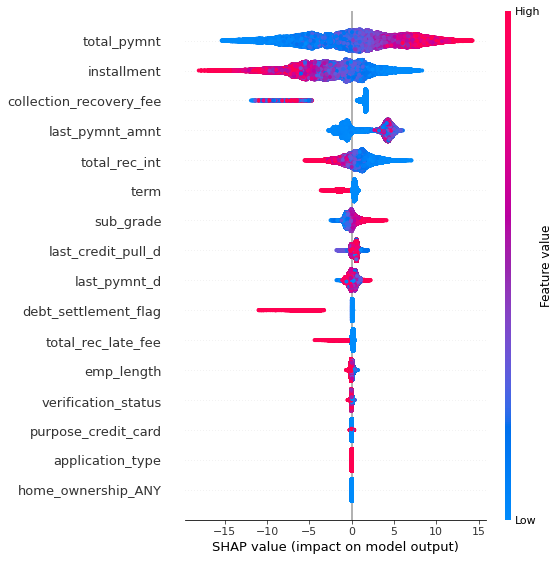

<Figure size 432x288 with 0 Axes>

In [48]:
import shap
import matplotlib.pyplot as plt

# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test)

# If you want to save the plot to a file
plt.savefig('shap_summary_plot.png')

# Show the plot
plt.show()

# Get the prediction values of the X_test data set

In [49]:
predict_set = pd.read_csv('X_test.csv')

In [50]:
predict_set = predict_set.drop(removableFeatures, axis=1)

In [51]:
predict_set = encodeClass(predict_set)   

In [52]:
transformDates('issue_d',predict_set)
transformDates('earliest_cr_line',predict_set)
transformDates('last_pymnt_d',predict_set)
transformDates('last_credit_pull_d',predict_set)

In [53]:
implimentNumericImputation(predict_set)            

In [54]:
selected_features = ['last_pymnt_amnt', 'collection_recovery_fee', 'total_pymnt',
         'last_credit_pull_d', 'application_type', 'term',
       'sub_grade', 'debt_settlement_flag', 'installment', 'total_rec_int',
       'verification_status', 'total_rec_late_fee', 'purpose_credit_card',
       'home_ownership_ANY', 'emp_length', 'last_pymnt_d']
predict_set = predict_set[selected_features]

In [55]:
y_predict = model.predict(predict_set)
predictions_val = [round(value) for value in y_predict]

In [56]:
predict_set.insert(0, 'loan_status', predictions_val)
#save in a csv file
predict_set.to_csv('210620M.csv', index=False)